### please put the image folder in the same directory of the file
### Date: 9/15/2021
### Based on: ML, DL, Classification and computer vision
### This Is the model 
### Author: Moamen Nasser

## here i import every single library that i need

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## initializing all the lists and the paths that i use


In [26]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

## editing the label of each image and store them into labels list

In [27]:
for i in range(classes):
    path = os.path.join(cur_path,'Images',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


## Convert lists into arrays with numpy

In [28]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Spliting the dataset and testing dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Start to build the model

In [30]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


## Compile the model

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 46s 47ms/step - loss: 2.0301 - accuracy: 0.4776 - val_loss: 0.6212 - val_accuracy: 0.8359
Epoch 2/15
981/981 [==============================] - 47s 48ms/step - loss: 0.8988 - accuracy: 0.7404 - val_loss: 0.3843 - val_accuracy: 0.8953
Epoch 3/15
981/981 [==============================] - 47s 48ms/step - loss: 0.6841 - accuracy: 0.7979 - val_loss: 0.2247 - val_accuracy: 0.9394
Epoch 4/15
981/981 [==============================] - 47s 48ms/step - loss: 0.5837 - accuracy: 0.8246 - val_loss: 0.2651 - val_accuracy: 0.9141
Epoch 5/15
981/981 [==============================] - 46s 47ms/step - loss: 0.5589 - accuracy: 0.8310 - val_loss: 0.1828 - val_accuracy: 0.9420
Epoch 6/15
981/981 [==============================] - 46s 47ms/step - loss: 0.5110 - accuracy: 0.8440 - val_loss: 0.1744 - val_accuracy: 0.9487
Epoch 7/15
981/981 [==============================] - 47s 48ms/step - loss: 0.4614 - accuracy: 0.8588 - val_loss: 0.1427 - val_accuracy:

### Load Dataset and Import Packages

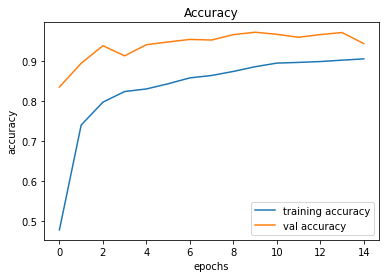

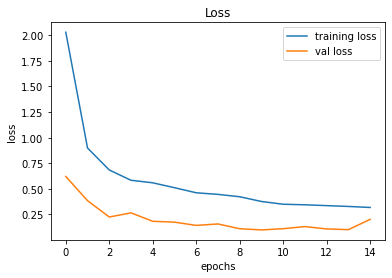

In [32]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Testing the accuracy on dataset

In [35]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

predict_x=model.predict(X_test) 
pred=np.argmax(predict_x,axis=1)


### Accuracy with the test data

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.8922406967537608
